In [1]:
import pandas as pd

In [2]:
df_ndcgs = pd.read_csv('control_vs_show-v1_queries_ndcg_difference_tables_with_v0v3.csv')
df_toptorsotail = pd.read_csv('top_searched_queries_stats_with_v0v3.csv')

In [3]:
len(df_ndcgs)

800

In [4]:
df_ndcgs = df_ndcgs.dropna()

In [5]:
len(df_ndcgs)

750

In [6]:
len(df_toptorsotail)

3001

In [7]:
df_toptorsotail = df_toptorsotail.dropna()

In [8]:
len(df_toptorsotail)

1132

In [9]:
df_ndcgs['v0_l2s'] = df_ndcgs['v0_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))
df_ndcgs['v3_l2s'] = df_ndcgs['v3_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))

In [10]:
df_toptorsotail['v0_l2s'] = df_toptorsotail['v0_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))
df_toptorsotail['v3_l2s'] = df_toptorsotail['v3_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))

In [11]:
recs = [] 
for i in df_ndcgs.to_dict('records'):
    v0_l2s = set(i['v0_l2s'])
    v3_l2s = set(i['v3_l2s'])
    jc = len(v0_l2s.intersection(v3_l2s)) / len(v0_l2s.union(v3_l2s))
    i['v0v3_l2s_jaccard'] = jc
    recs.append(i)
df_ndcgs = pd.DataFrame(recs)

recs = [] 
for i in df_toptorsotail.to_dict('records'):
    v0_l2s = set(i['v0_l2s'])
    v3_l2s = set(i['v3_l2s'])
    jc = len(v0_l2s.intersection(v3_l2s)) / len(v0_l2s.union(v3_l2s))
    i['v0v3_l2s_jaccard'] = jc
    recs.append(i)
df_toptorsotail = pd.DataFrame(recs)

# analyze ndcg

In [12]:
df_ndcgs['mean_lift'] = -(df_ndcgs['control - show-v1 NDCG @ 10'] + df_ndcgs['control - show-v1 NDCG @ 30'] + df_ndcgs['control - show-v1 NDCG @ 50'] + \
    df_ndcgs['control - show-v1 NDCG @ 100'] + df_ndcgs['control - show-v1 NDCG @ 300']) / 5

In [13]:
df_ndcgs[['mean_lift', 'v0v3_l2s_jaccard']].corr()

,mean_lift,v0v3_l2s_jaccard
mean_lift,1.000000,0.011307
v0v3_l2s_jaccard,0.011307,1.000000


In [14]:
df_ndcgs.sort_values('v0v3_l2s_jaccard').to_csv(
    'control_vs_show-v1_queries_ndcg_difference_tables_with_v0v3_with_jaccard.csv', index=False)

/home/vscode/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='mean_lift', ylabel='v0v3_l2s_jaccard'>

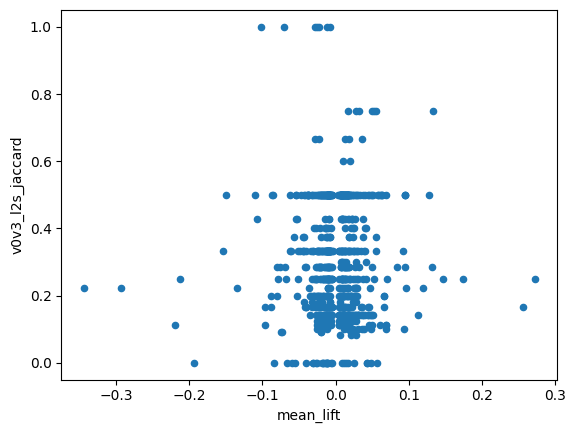

In [15]:
df_ndcgs.plot.scatter('mean_lift', 'v0v3_l2s_jaccard')

In [16]:
df_ndcgs[['query', 'query_type', 'v0_l2s', 'v3_l2s', 'v0v3_l2s_jaccard', 'mean_lift']].sort_values('v0v3_l2s_jaccard').head(10).to_dict('records')

[{'query': 'jordans',
  'query_type': 'A2C-Pos',
  'v0_l2s': ["Men's Clothing > Men's Sets",
   'Jewelry & Accessories > Fine Jewelry',
   "Men's Clothing"],
  'v3_l2s': ['Sports > Sneakers',
   "Shoes > Men's Shoes",
   'Sports > Sneakers',
   "Shoes > Women's Shoes",
   "Mother & Kids > Children's Shoes",
   "Shoes > Men's Shoes",
   'Shoes',
   "Mother & Kids > Children's Shoes",
   'Sports > Sneakers',
   "Shoes > Men's Shoes"],
  'v0v3_l2s_jaccard': 0.0,
  'mean_lift': 0.025684004},
 {'query': 'slime',
  'query_type': 'A2C-Neg',
  'v0_l2s': ['Toys & Hobbies > Learning & Education',
   'Toys & Hobbies',
   'Toys & Hobbies > Learning & Education'],
  'v3_l2s': ['Toys & Hobbies > Stress Relief Toys',
   'Toys & Hobbies > Stress Relief Toys',
   'Toys & Hobbies > Arts, Crafts & DIY Toys'],
  'v0v3_l2s_jaccard': 0.0,
  'mean_lift': -0.084714592},
 {'query': 'slime',
  'query_type': 'GMV-Neg',
  'v0_l2s': ['Toys & Hobbies > Learning & Education',
   'Toys & Hobbies',
   'Toys & Hobbies 

In [17]:
df_ndcgs[['query', 'query_type', 'v0_l2s', 'v3_l2s', 'v0v3_l2s_jaccard', 'mean_lift']].sort_values('v0v3_l2s_jaccard', ascending=False).head(10).to_dict('records')

[{'query': 'drone',
  'query_type': 'GMV-Neg',
  'v0_l2s': ['Toys & Hobbies > Remote Control Toys',
   'Consumer Electronics > Camera & Photo',
   'Toys & Hobbies > Remote Control Toys'],
  'v3_l2s': ['Consumer Electronics > Camera & Photo',
   'Consumer Electronics > Camera & Photo',
   'Toys & Hobbies > Remote Control Toys',
   'Consumer Electronics > Camera & Photo',
   'Toys & Hobbies > Remote Control Toys',
   'Toys & Hobbies > Remote Control Toys',
   'Consumer Electronics > Camera & Photo',
   'Consumer Electronics > Camera & Photo'],
  'v0v3_l2s_jaccard': 1.0,
  'mean_lift': -0.00842773},
 {'query': 'gel nail polish',
  'query_type': 'GMV-Neg',
  'v0_l2s': ['Beauty & Health > Nail Art & Tools',
   'Beauty & Health > Nail Art & Tools',
   'Beauty & Health > Nail Art & Tools'],
  'v3_l2s': ['Beauty & Health > Nail Art & Tools',
   'Beauty & Health > Nail Art & Tools',
   'Beauty & Health > Nail Art & Tools',
   'Beauty & Health > Nail Art & Tools',
   'Beauty & Health > Nail Art 

In [18]:
df_ndcgs[['query', 'query_type', 'v0_l2s', 'v3_l2s', 'v0v3_l2s_jaccard', 'mean_lift']].sort_values('mean_lift').head(10).to_dict('records')

[{'query': 'guns for adults',
  'query_type': 'A2C-Neg',
  'v0_l2s': ['Toys & Hobbies > Outdoor Fun & Sports',
   'Sports > Hunting',
   'Sports',
   'Tools > Hand Tools'],
  'v3_l2s': ['Toys & Hobbies > Outdoor Fun & Sports',
   'Sports > Hunting',
   'Sports > Hunting',
   'Sports > Shooting',
   'Consumer Electronics > Video Games',
   'Toys & Hobbies > Pools & Water Fun',
   'Sports > Hunting',
   'Tools > Power Tools',
   'Sports > Shooting',
   'Security & Protection > Self Defense Supplies'],
  'v0v3_l2s_jaccard': 0.2222222222222222,
  'mean_lift': -0.34383117999999996},
 {'query': 'guns for adults',
  'query_type': 'CTR-Neg',
  'v0_l2s': ['Toys & Hobbies > Outdoor Fun & Sports',
   'Sports > Hunting',
   'Sports',
   'Tools > Hand Tools'],
  'v3_l2s': ['Toys & Hobbies > Outdoor Fun & Sports',
   'Sports > Hunting',
   'Sports > Hunting',
   'Sports > Shooting',
   'Consumer Electronics > Video Games',
   'Toys & Hobbies > Pools & Water Fun',
   'Sports > Hunting',
   'Tools > P

In [19]:
df_ndcgs[['query', 'query_type', 'v0_l2s', 'v3_l2s', 'v0v3_l2s_jaccard', 'mean_lift']].sort_values('mean_lift', ascending=False).head(10).to_dict('records')

[{'query': 'squishmallows',
  'query_type': 'CTR-Pos',
  'v0_l2s': ['Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Toys & Hobbies'],
  'v3_l2s': ['Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Toys & Hobbies > Stress Relief Toys',
   'Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Home & Garden > Home Textile',
   'Toys & Hobbies > Stuffed Animals & Plush Toys',
   'Toys & Hobbies > Stress Relief Toys'],
  'v0v3_l2s_jaccard': 0.25,
  'mean_lift': 0.272110168},
 {'query': 'flesh light',
  'query_type': 'CTR-Pos',
  'v0_l2s': ['Home Improvement > Lights & Lighting',
   'Beauty & Health > Oral Hygiene',
   'Home Improvement > Lights & Lighting',
   'Home Improvement'],
  'v3_l2s': ['Home Improvement > Lights & Lighti

# analyze head torso tail

<AxesSubplot: ylabel='Frequency'>

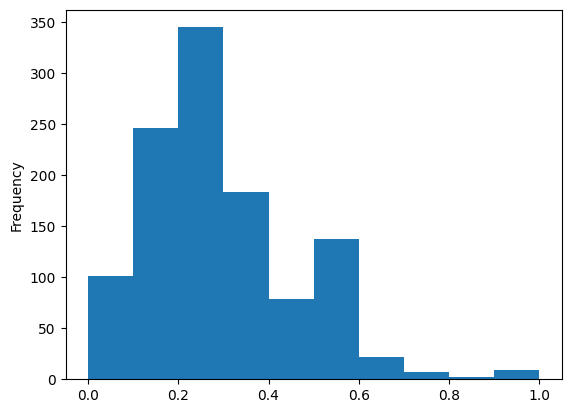

In [37]:
df_toptorsotail.v0v3_l2s_jaccard.plot.hist()

In [38]:
df_toptorsotail.sort_values('v0v3_l2s_jaccard').to_csv(
    'top_searched_queries_stats_with_v0v3_with_jaccard.csv', index=False)